In [4]:
# import required libraries
import scipy.integrate
import sympy

from utils import *
from task_3 import andronov_hopf, task_3_plot_andronov_hopf_phase_diagrams

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
# define notebook parameters
w = 3
Y, X = np.mgrid[-w:w:100j, -w:w:100j]

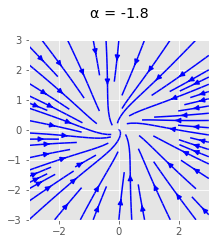

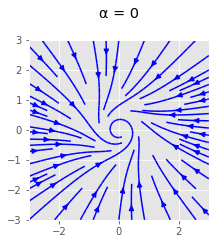

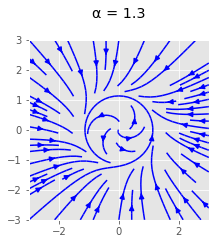

In [8]:
# create a list containing different parameters
alphas = [-1.8, 0, 1.3]

task_3_plot_andronov_hopf_phase_diagrams(X, Y, alphas, False) # set False to True if you want to save the figures

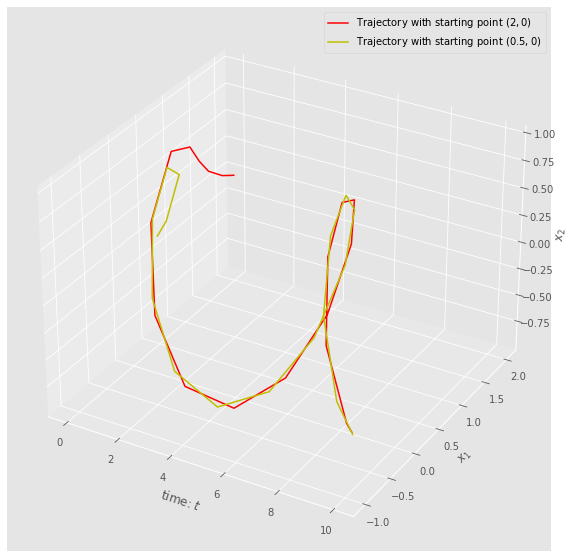

In [36]:
# solve the ODEs w.r.t to time and position -- for initial positions (2,0) and (0.5,0)
sol = scipy.integrate.solve_ivp(lambda t, y: andronov_hopf(1.0, y[0], y[1]), (0, 10), [2, 0])
sol_ = scipy.integrate.solve_ivp(lambda t, y: andronov_hopf(1.0, y[0], y[1]), (0, 10), [0.5, 0])

# plot both trajectories in 3D
fig = plt.figure(figsize=(10, 10))
ax0 = plt.axes(projection="3d")
ax0.plot(sol.t, sol.y[0], sol.y[1], label=r"Trajectory with starting point $(2, 0)$", color="r")
ax0.plot(sol_.t, sol_.y[0], sol_.y[1], label=r"Trajectory with starting point $(0.5, 0)$", color="y")
ax0.set_xlabel("time: " + r"$t$")
ax0.set_ylabel(r"$x_1$")
ax0.set_zlabel(r"$x_2$")
ax0.legend()
ax0.set_aspect(aspect="auto")
#fig.savefig("task3_orbits.pdf")

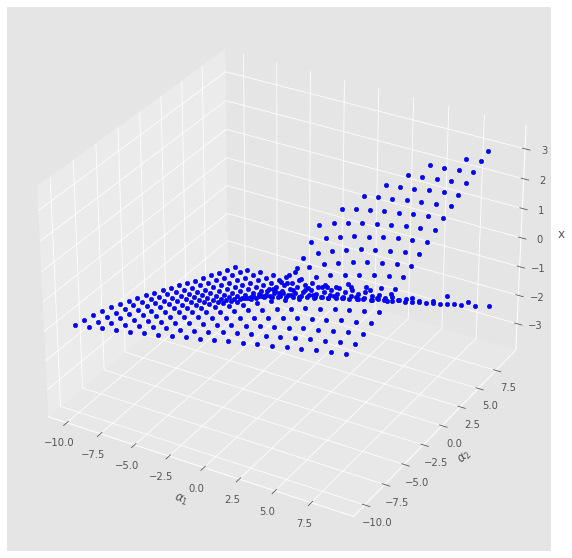

In [23]:
x = sy.symbols("x")
# create sample points (alpha_1, alpha_2)
sample_points = [(x_, y_) for x_ in np.arange(-10.0, 10.0, 1.0) for y_ in np.arange(-10.0, 10.0, 1.0)]

# prepare a 3d plot (alpha_1, alpha_2 bottom plane, x third direction)
plt.figure(figsize=(10, 10))
ax0 = plt.axes(projection='3d')
ax0.set_xlabel(r"$\alpha_1$")
ax0.set_ylabel(r"$\alpha_2$")
ax0.set_zlabel("x")

# for each sample point solve equation = 0 w.r.t x and plot it
for idx, _ in enumerate(sample_points):
    solution = sy.solveset(sample_points[idx][0] + x * sample_points[idx][1] - x**3, x, domain=sympy.Reals)
    ax0.scatter3D(sample_points[idx][0], sample_points[idx][1], list(solution)[0], color='blue')
fig.savefig("task3_cusp_bifurcation.pdf")